<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Univariant Curves for T-P diagrams</h1><br />
</tr>
</table>
</left>

In [1]:
import sys
sys.path.append('/home/jupyteruser/CHNOSZ-main/python')

from chnosz import *
#_ = thermo("WORM")

Equilibrium between the minerals calcite and aragonite can be written as

$$\text{calcite} = \text{aragonite}$$

It is possible to solve for the logK, the logarithm of the equilibrium constant, of this reaction at a variety of temperatures and pressures. This is shown below with pyCHNOSZ's `subcrt` function:

In [2]:
out = subcrt(
             species=["calcite", "aragonite"], # chemical species
             state=["cr", "cr"], # aq, gas, liq, cr
             coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
             T=[25, 25, 300, 300], P=[1, 5000, 1, 5000], # temperature and pressures used to solve for logK
             show=False, messages=False, # keep this output minimal
             )

out.out # show the table of results

reset: thermodynamic system initialized


,T,P,G,H,S,V,Cp,logK
0,25.0,1.0,507.203750,-394.700000,-3.025000,-2.700000,-1.472879,-0.088858
1,25.0,5000.0,-835.210726,-1901.197083,-3.575336,-2.670248,-1.472879,0.146323
2,300.0,1.0,1484.218270,-695.570862,-3.803174,-2.460713,0.057651,-0.135263
3,300.0,5000.0,261.423500,-2101.559121,-4.122800,-2.430960,0.057651,-0.023825


As shown in the table above, changing temperature and pressure will change the calculated logK of the reaction.

However, **what if you want to start with a logK and solve for temperatures and pressures** instead?

For instance, what if you want to find temperature and pressure values where logK equals 0 for the calcite to aragonite reaction? Connecting those points with a curve would represent the phase boundary between calcite and anorthite. This is known as a univariant curve, where univariant refers to having one degree of freedom. For a curve in T-P space, if you chose one variable, the other is already determined. That's only one degree of freedom, so we want a univariant curve.

This is where pyCHNOSZ's `univariant_TP` function is handy:

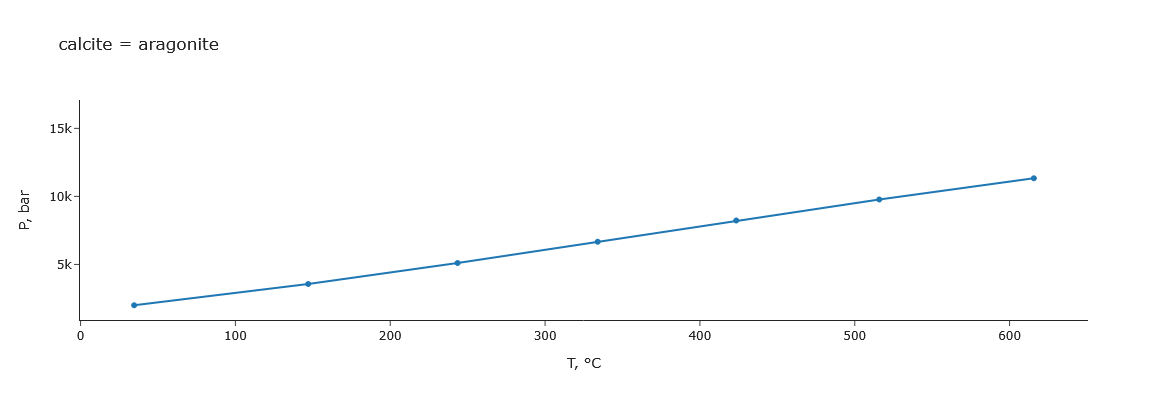

In [3]:
out = univariant_TP(logK=0, # desired logK or list of logK values
                    species=["calcite", "aragonite"], # chemical species
                    state=["cr", "cr"], # aq, gas, liq, cr
                    coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
                    Trange=[0, 700], # temperature range to check, degrees C
                    Prange=[2000, 16000], # pressure range to check, bars
      )

In the plot above, the calculated points correspond to temperature-pressure (T-P) pairs where the logK of the reaction is 0.

Multiple univariant curves can be plotted for a list of logK values:

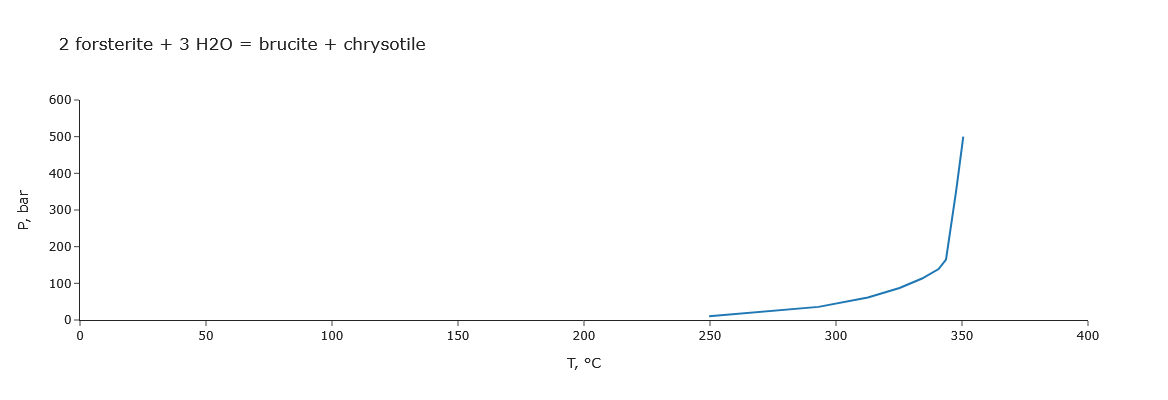

In [4]:
out = univariant_TP(logK=0, # desired logK or list of logK values
                    species=["forsterite","H2O", "brucite","chrysotile"], # chemical species
                    state=["cr", "liq", "cr", "cr"], # aq, gas, liq, cr
                    coeff=[-2, -3, 1, 1], # reaction stoichiometry (negative for reactants, positive for products)
                    Trange=[0, 700], # temperature range to check, degrees C
                    Prange=[10, 500], # pressure range to check, bars
                    res=20, # number of calculations to show along the curve
                    xlim=[0, 400], # x-axis range
                    ylim=[0, 600], # y-axis range
                    line_type="lines", # this will show curves without markers
      )

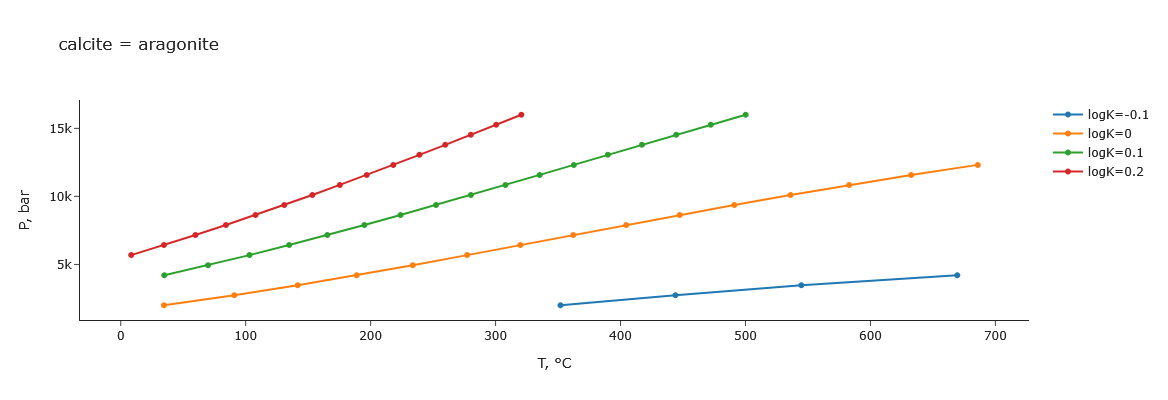

In [5]:
out = univariant_TP(logK=[-0.2, -0.1, 0, 0.1, 0.2], # desired logK or list of logK values
                    species=["calcite", "aragonite"], # chemical species
                    state=["cr", "cr"], # aq, gas, liq, cr
                    coeff=[-1, 1], # reaction stoichiometry (negative for reactants, positive for products)
                    Trange=[0, 700], # temperature range to check, degrees C
                    Prange=[2000, 16000], # pressure range to check, bars
                    res=20, # number of calculations to attempt along the pressure range
      )

Notice too how the number of points in the curve have increased by setting the resolution, `res`, to 20 (`res=10` by default).

Univariate curves for a different reaction are shown in the plot below:

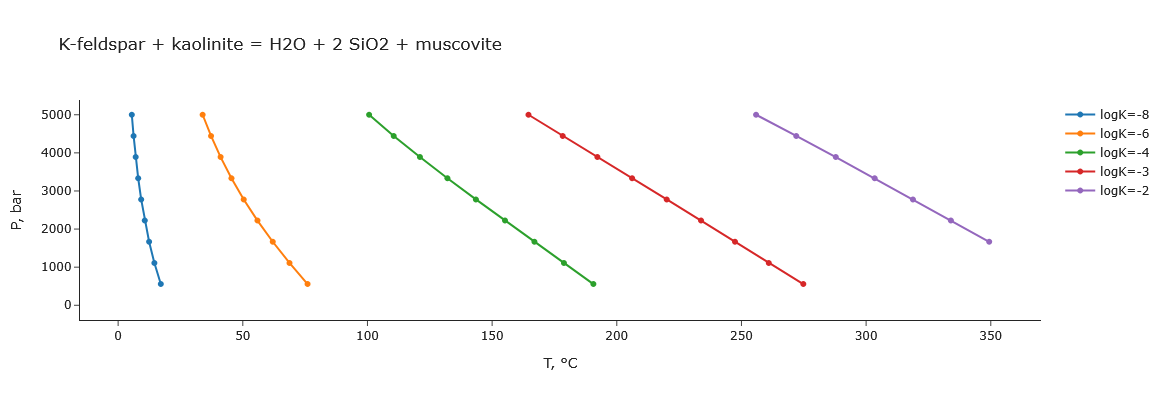

In [6]:
out = univariant_TP(logK=[-8, -6, -4, -3, -2], # desired logK or list of logK values
                    species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # chemical species
                    state=["cr", "cr", "liq", "aq", "cr"], # aq, gas, liq, cr
                    coeff=[-1, -1, 1, 2, 1], # reaction stoichiometry (negative for reactants, positive for products)
                    Trange=[0, 350], # temperature range to check, degrees C
                    Prange=[1, 5000], # pressure range to check, bars
                    width=700, # plot width, in pixels
      )

More detail about the curves is stored in the output of the `univariate_TP` function.

For instance, the first of the five curves can be accessed with:

In [7]:
# access information about the reaction itself; ["reaction"]

out[0].reaction # the [0] means the first stored curve (indexing in python starts with 0, not 1)

,coeff,name,formula,state,ispecies,model
0,-1,K-feldspar,KAlSi3O8,cr,1882,Berman
1,-1,kaolinite,Al2Si2O9H4,cr,1868,Berman
2,1,water,H2O,liq,1,water.SUPCRT92
3,2,SiO2,SiO2,aq,67,HKF
4,1,muscovite,KAl3Si3O12H2,cr,1878,Berman


In [8]:
# access information about the results; ["out"]

out[0].out # the [0] means the first stored curve (indexing in Python starts with 0, not 1)

,T,P,logK,G,H,S,V,Cp,rho,Warning
0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,Could not converge on T for this P within 0 an...
1,17.115759,556.444444,-8.000000,44456.543053,82244.625110,129.818634,-14.476500,-920.796084,None,NaN
2,14.539161,1111.888889,-8.000000,44061.914192,88826.604024,155.231820,-12.934091,-1018.402879,None,NaN
3,12.424505,1667.333333,-8.000000,43738.037545,96290.478650,183.651770,-11.609018,-1108.688855,None,NaN
4,10.683700,2222.777778,-8.000000,43471.419320,104503.532009,214.653633,-10.457845,-1191.355725,None,NaN
5,9.244225,2778.222222,-8.000000,43250.952049,113348.269187,247.849047,-9.454494,-1266.542559,None,NaN
6,8.047011,3333.666667,-8.000000,43067.589133,122723.794426,282.897842,-8.579305,-1334.757879,None,NaN
7,7.044567,3889.111111,-8.000000,42914.056656,132546.590160,319.514960,-7.815347,-1396.746970,None,NaN
8,6.199152,4444.555556,-8.000001,42784.578152,142749.181189,357.468153,-7.147528,-1453.317742,None,NaN
9,5.480855,5000.000000,-8.000002,42674.569611,153278.163939,396.572794,-6.562098,-1505.188053,None,NaN


Change 0 to 1 to see the second curve:

In [9]:
# access information about the results; ["out"]

out[1]["out"] # the [1] means the second stored curve (indexing in Python starts with 0, not 1)

,T,P,logK,G,H,S,V,Cp,rho,Warning
0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,Could not converge on T for this P within 0 an...
1,75.987247,556.444444,-6.000000,40104.887910,56260.850369,45.969844,-21.750172,-124.634947,None,NaN
2,68.727148,1111.888889,-5.999999,39270.927631,57670.023192,53.507285,-21.213027,-161.275673,None,NaN
3,62.012362,1667.333333,-5.999997,38499.596520,59805.008272,63.250640,-20.604241,-202.438069,None,NaN
4,55.888110,2222.777778,-6.000000,37796.129282,62693.460598,75.344323,-19.935034,-247.683779,None,NaN
5,50.371453,2778.222222,-6.000000,37162.438904,66343.203503,89.869116,-19.221488,-296.399153,None,NaN
6,45.451988,3333.666667,-6.000000,36597.347160,70741.526491,106.835497,-18.481839,-347.843430,None,NaN
7,41.097866,3889.111111,-6.000000,36097.195582,75857.863727,126.188575,-17.734221,-401.281034,None,NaN
8,37.262769,4444.555556,-6.000000,35656.663734,81649.419954,147.824391,-16.994584,-456.126500,None,NaN
9,33.893092,5000.000000,-6.000000,35269.594800,88067.206927,171.609249,-16.275510,-512.054146,None,NaN


Change 1 to 2 to see the third curve, and so on.

End of demo.